In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import numpy as np
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

df = pd.read_csv('bell_jar_chapters.csv')  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/martina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/martina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Topic Modeling

In [4]:
# A function to get one topic for chapter
def topic_chapter(df):
    for index, row in df.iterrows():
        print(f"\nChapter {index + 1}:")
        
        vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
        dtm = vectorizer.fit_transform([row['Content']])  
        
        lda = LatentDirichletAllocation(n_components=1, random_state=42)
        lda.fit(dtm)
        
        topic = lda.components_[0]
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


topic_chapter(df)


Chapter 1:
['white', 'way', 'lenny', 'girls', 'just', 'man', 'didn', 'said', 'like', 'doreen']

Chapter 2:
['water', 'said', 'felt', 'elly', 'door', 'room', 'didn', 'like', 'lenny', 'doreen']

Chapter 3:
['betsy', 'caviar', 'time', 'course', 'said', 'couldn', 'thought', 'cee', 'jay', 'like']

Chapter 4:
['didn', 'looked', 'head', 'felt', 'betsy', 'thought', 'jay', 'cee', 'said', 'like']

Chapter 5:
['just', 'came', 'didn', 'like', 'man', 'house', 'thought', 'willard', 'said', 'buddy']

Chapter 6:
['time', 'thought', 'man', 'woman', 'just', 'like', 'didn', 'baby', 'said', 'buddy']

Chapter 7:
['bed', 'girl', 'willard', 'woman', 'man', 'way', 'thought', 'said', 'like', 'constantin']

Chapter 8:
['ski', 'll', 'know', 'white', 'thought', 'said', 'mr', 'like', 'willard', 'buddy']

Chapter 9:
['room', 'night', 'hilda', 'didn', 'cee', 'jay', 'doreen', 'like', 'said', 'marco']

Chapter 10:
['college', 'didn', 'dodo', 'writing', 'thought', 'said', 'course', 'white', 'mother', 'like']

Chapter 

In [10]:
## Sample DataFrame structure
# df = pd.DataFrame({'Content': ["Chapter 1 text...", "Chapter 2 text...", ...]})

def preprocess_texts(texts):
    stop_words = set(stopwords.words('english'))
    preprocessed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        preprocessed_texts.append(filtered_tokens)
    return preprocessed_texts

# A function to perform topic modeling on all chapters and visualize with pyLDAvis
def perform_and_visualize_topic_modeling(df, n_topics=20):
    texts = preprocess_texts(df['Content'])
    
    # Creating a dictionary and corpus for gensim
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42)
    
    pyLDAvis.enable_notebook()
    panel = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds='tsne')
    return panel

perform_and_visualize_topic_modeling(df, n_topics=10)



/Users/martina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/martina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/martina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/martina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      201.945068   76.023659       1        1  24.438528
9       82.298546  132.165894       2        1  24.131163
0      109.795334 -168.202789       3        1  20.444968
2      214.053711  -69.352028       4        1   9.714308
3       -6.894717 -116.647011       5        1   8.755182
8      -19.312330   24.115894       6        1   7.336727
5     -146.689209   59.765884       7        1   5.135478
7     -130.044952  -82.956253       8        1   0.031403
4      -45.748608  164.579559       9        1   0.006121
6       92.928291  -15.739152      10        1   0.006121, topic_info=        Term        Freq       Total Category  logprob  loglift
463     like  342.000000  342.000000  Default  30.0000  30.0000
682     said  330.000000  330.000000  Default  29.0000  29.0000
976    would  341.000000  341.000000  Default  28.0000  28.0000
180    could  249.000000  249.000000  Default  27.0000  27.0000
573      one  189.000000  189.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
1272  mother    0.005660  124.400704  Topic10  -5.8709  -0.2966
1476   woman    0.004770   83.530059  Topic10  -6.0421  -0.0694
215     door    0.004640   80.286980  Topic10  -6.0696  -0.0574
216   doreen    0.004740   97.046743  Topic10  -6.0483  -0.2256
884     time    0.004645  105.219661  Topic10  -6.0686  -0.3268

[837 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5112      1  0.289193  account
5112      2  0.289193  account
5112      3  0.289193  account
5114      1  0.224815   afraid
5114      2  0.224815   afraid
...     ...       ...      ...
988       3  0.208189     york
988       4  0.118965     york
988       5  0.089224     york
988       6  0.059483     york
988       7  0.059483     york

[1849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 1, 3, 4, 9, 6, 8, 5, 7])

2. Word Frequency Analysis

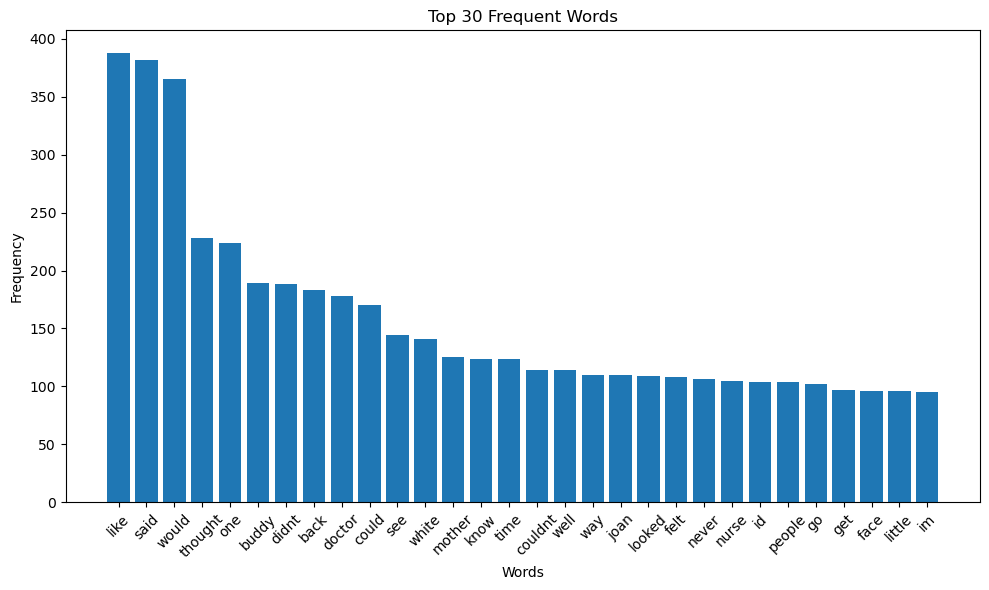

In [6]:
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words

def word_frequency_analysis(df):
    word_counter = Counter()
    for content in df['Content']:
        words = clean_and_tokenize(content)
        word_counter.update(words)
    return word_counter

# Visualize word frequency
def plot_word_frequency(word_counter, top_n=20):
    most_common_words = word_counter.most_common(top_n)
    words, frequencies = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(f'Top {top_n} Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run word frequency analysis and plot
word_counter = word_frequency_analysis(df)
plot_word_frequency(word_counter, top_n=30)

3. N-Gram Analysis

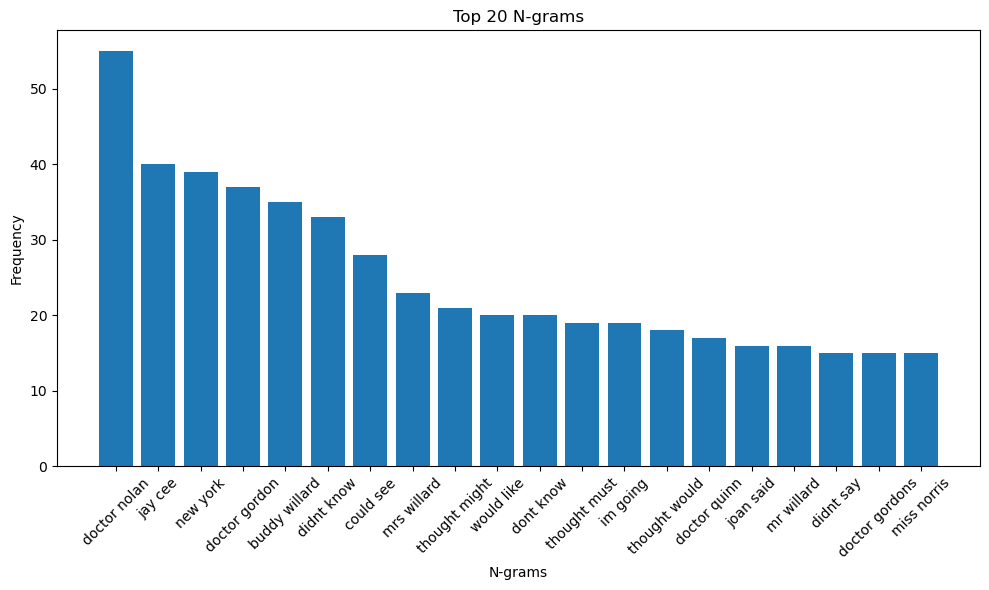

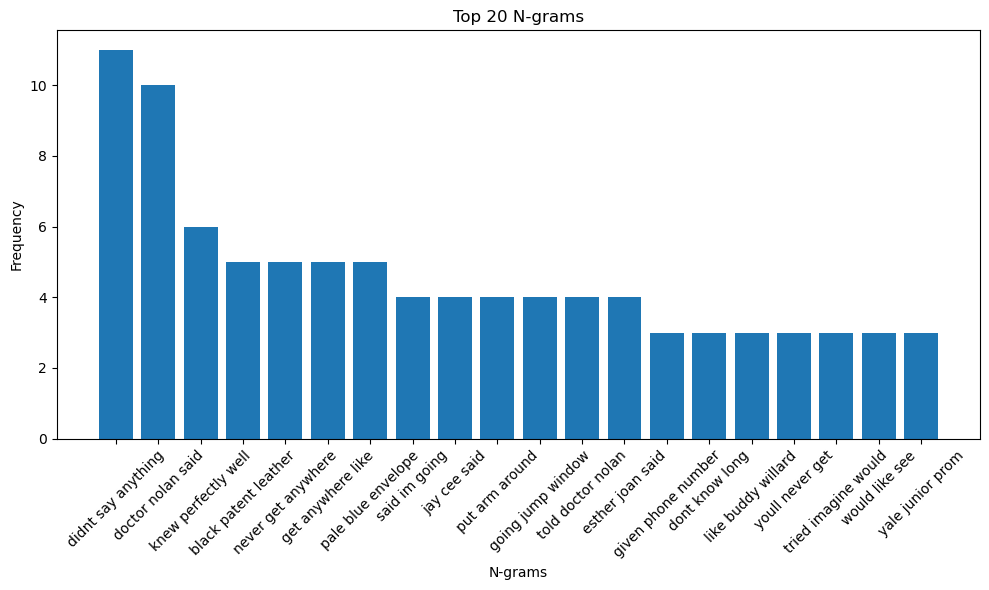

In [7]:
def create_ngrams(words, n):
    return list(nltk.ngrams(words, n))

def ngram_frequency_analysis(df, n=2):
    ngram_counter = Counter()
    for content in df['Content']:
        words = clean_and_tokenize(content)
        ngrams_list = create_ngrams(words, n)
        ngram_counter.update(ngrams_list)
    return ngram_counter

# Visualize n-grams
def plot_ngram_frequency(ngram_counter, top_n=10):
    most_common_ngrams = ngram_counter.most_common(top_n)
    ngrams, frequencies = zip(*most_common_ngrams)
    ngrams_str = [' '.join(ngram) for ngram in ngrams]

    plt.figure(figsize=(10, 6))
    plt.bar(ngrams_str, frequencies)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run n-gram analysis
bigram_counter = ngram_frequency_analysis(df, n=2)
plot_ngram_frequency(bigram_counter, top_n=20)

trigram_counter = ngram_frequency_analysis(df, n=3)
plot_ngram_frequency(trigram_counter, top_n=20)

4. Character Network

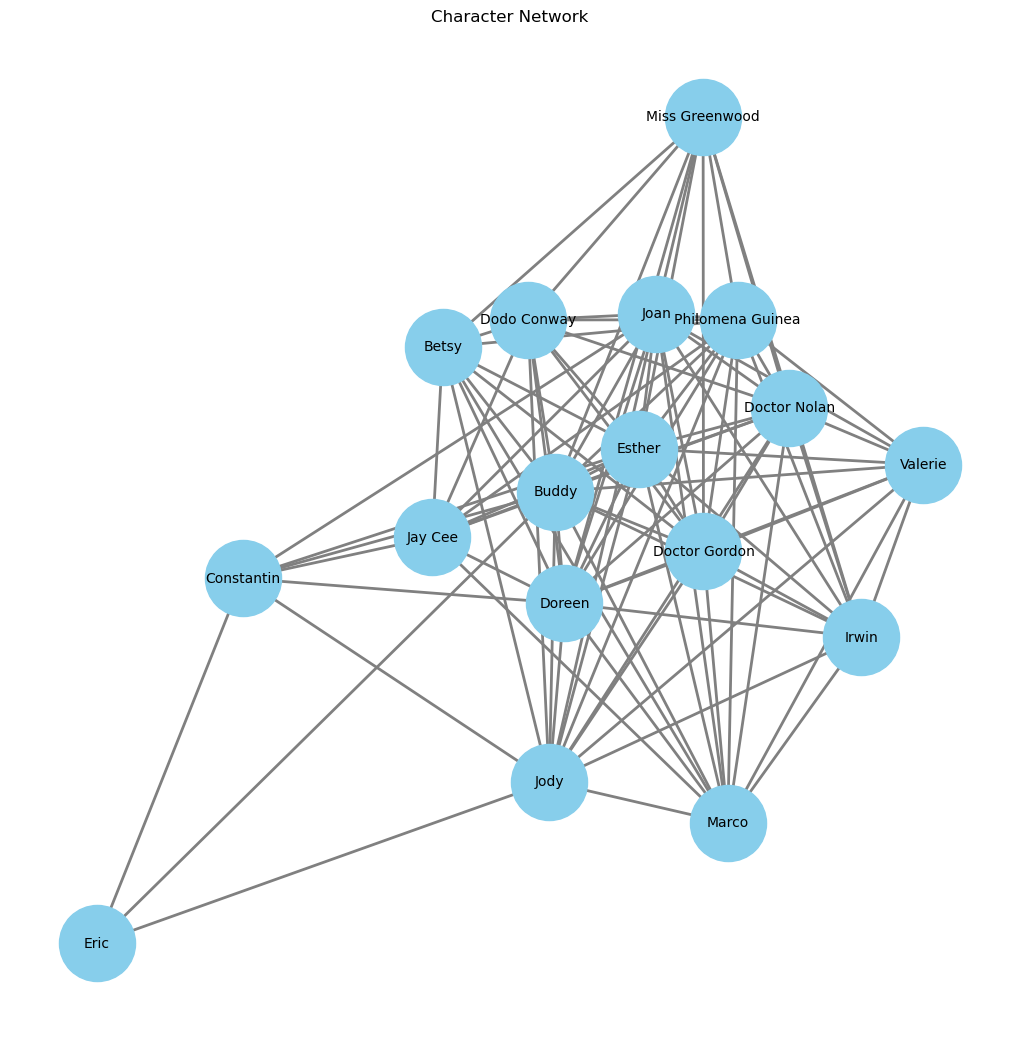

In [8]:
def create_character_network(df, character_names):
    G = nx.Graph()
    
    for content in df['Content']:
        for i, name1 in enumerate(character_names):
            for name2 in character_names[i+1:]:
                if name1 in content and name2 in content:
                    if G.has_edge(name1, name2):
                        G[name1][name2]['weight'] += 1
                    else:
                        G.add_edge(name1, name2, weight=1)
    
    return G

# Visualize the character network
def plot_character_network(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, width=2, edge_color='gray')
    plt.title('Character Network')
    plt.show()

all_characters = ['Esther', 'Miss Greenwood', 'Buddy', 'Doctor Nolan', 'Doreen', 'Joan', 'Jay Cee', 'Betsy', 'Constantin', 'Marco', 'Irwin', 'Doctor Gordon', 'Philomena Guinea', 'Mrs. Willard', 'Lenny Sheperd', 'Eric', 'Dodo Conway', 'Jody', 'Valerie']  

# Run character network analysis
G = create_character_network(df, all_characters)
plot_character_network(G)


5. Wordcloud

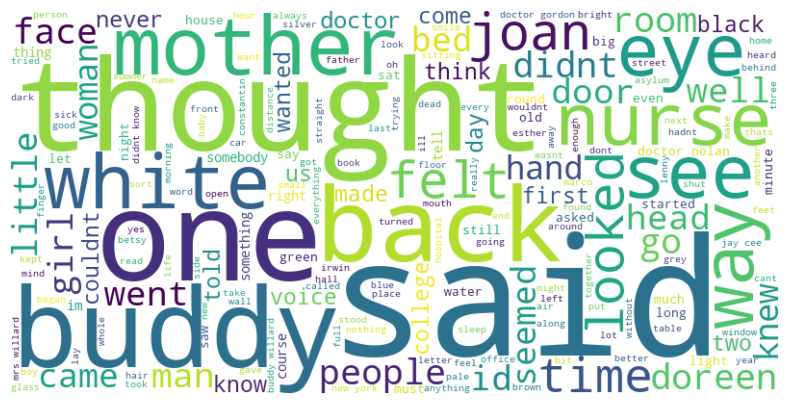

In [9]:
# All chapters in one string
all_text = ' '.join(df['Content'].tolist())

def cloud_text(text):
    # Removing punctuation and non-alphabetic characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Preprocess the text from the book
processed_text = cloud_text(all_text)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

wordcloud = WordCloud(max_words=70).generate(processed_text)